In [81]:
import pandas as pd
import numpy as np
from datetime import datetime
file=pd.read_csv(r'C:\Users\Tewodata\Desktop\hdlss\movie.csv')


In [82]:
print(file.shape)
file.head()


(2574, 4)


,title,premiered,total_views,rank
0,Den 12. mann,25.12.2017,214 353,1
1,Ferdinand,25.12.2017,98 793,2
2,Star Wars: The Last Jedi,13.12.2017,401 785,3
3,Paddington 2,08.12.2017,98 896,4
4,Solsidan - Filmen,01.12.2017,85 020,5


#### total_views is sum of all views up until the last weekend of 2017. 
#### rank is the rank of the movie based on views in each weekend
#### check https://www.filmweb.no/filmtoppen/#view=weekend&back=1 for further information

In [83]:
file.dtypes
# some data type conversion is required 

title          object
premiered      object
total_views    object
rank            int64
dtype: object

In [84]:
file['total_views']=file['total_views'].str.replace(' ','')
file['total_views']=file['total_views'].astype(int)
file.head()


,title,premiered,total_views,rank
0,Den 12. mann,25.12.2017,214353,1
1,Ferdinand,25.12.2017,98793,2
2,Star Wars: The Last Jedi,13.12.2017,401785,3
3,Paddington 2,08.12.2017,98896,4
4,Solsidan - Filmen,01.12.2017,85020,5


In [85]:
movie_name_list=pd.Series(file['title'].unique())
len(movie_name_list)


425

rank ranges from 1 to over 60, however the relevant information is how many times a said movie stayed in top 3. Therefore, rank 0 in the next table showns that the movie hasn't  been in the top three at all. 

In [8]:
maxview=dict()
rank=dict()
premiered=dict()
for mov in movie_name_list:
    df=file[file['title']==mov] 
    maxview[mov]=df['total_views'].max()
    premiered[mov]=df['premiered'].iloc[0]
    rank[mov]=len(df['rank'][df['rank']<=3])
       


In [9]:
df_view=pd.DataFrame([maxview]).transpose().reset_index()
df_rank=pd.DataFrame([rank]).transpose().reset_index()
df_premiered=pd.DataFrame([premiered]).transpose().reset_index()
df_view.columns=['title','total_views']
df_rank.columns=['title','rank']
df_premiered.columns=['title','premiered']
df_merged=pd.merge(df_view,df_premiered, on='title').merge(df_rank,on='title')
df_merged.head()


,title,total_views,premiered,rank
0,120 slag i minuttet,645,23.03.2018,0
1,13 + To Hell - tamilfilm,410,15.09.2017,0
2,24 uker,290,25.08.2017,0
3,31,66,28.01.2017,0
4,"4 måneder, 3 uker og 2 dager",12044,26.12.2007,0


In [36]:
#change the premiered to datetime datatype
df_merged['premiered']=df_merged['premiered'].str.replace(' ','')
df_merged['premiered']= pd.to_datetime(df_merged['premiered'], format='%d.%m.%Y',errors='coerce')

In [37]:
df_final=df_merged.copy()
df_final.head()

,title,total_views,premiered,rank
0,120 slag i minuttet,645,2018-03-23,0
1,13 + To Hell - tamilfilm,410,2017-09-15,0
2,24 uker,290,2017-08-25,0
3,31,66,2017-01-28,0
4,"4 måneder, 3 uker og 2 dager",12044,2007-12-26,0


In [38]:
#First let see which movie the most watched as of 2017.The total views is commulative views for each weekend in 2017,
#therefore we can't agregate it. The rank is based on views during the corresponding weekend. 
top10=df_final.nlargest(10, 'total_views',keep='first')
top10
#Most of those movies premiered long before 2017 which explains why they are in top 10 in terms of views

,title,total_views,premiered,rank
338,Solan og Ludvig - Jul i Flåklypa,895737,2013-11-08,0
63,Bølgen,833399,2015-08-28,0
220,Kongens nei,730655,2016-09-23,0
346,Star Wars: The Force Awakens,634267,2015-12-16,0
336,Snekker Andersen og Julenissen,514048,2016-11-11,0
137,Frost,507140,2013-12-25,0
308,Reisen til julestjernen,475680,2012-11-09,0
260,Minions,460573,2015-07-03,0
64,Børning 2,440781,2016-10-12,0
106,Dyrene i Hakkebakkeskogen,435677,2016-12-25,4


#### E.g. Solan og lUdvig-Jul i Føåklypa premiered in 2013, the total_views
##### doesn't reflect the views in 2017. Instead let us filter movies premiered in 2018. Let us filter movies premiered in 2017

In [39]:

premiered_2018=df_final[df_final['premiered']>=datetime(2017,1,1)]
premiered_2018.sort_values('total_views',ascending=False).head(10)

,title,total_views,premiered,rank
347,Star Wars: The Last Jedi,401785,2017-12-13,6
27,Askeladden - I Dovregubbens hall,354196,2017-09-29,0
331,Skjønnheten og udyret,349392,2017-03-17,6
150,Grusomme meg 3,322530,2017-06-30,5
293,Pirates of the Caribbean: Salazar's Revenge,316113,2017-05-24,4
403,Vaiana,298154,2017-02-03,6
125,Fast & Furious 8,284952,2017-04-12,3
363,The Boss Baby,274561,2017-04-07,5
127,Fifty Shades Darker,245265,2017-02-10,2
177,IT,240042,2017-09-08,0


In [40]:
top10=premiered_2018.nlargest(10, 'total_views',keep='first')
top10

,title,total_views,premiered,rank
347,Star Wars: The Last Jedi,401785,2017-12-13,6
27,Askeladden - I Dovregubbens hall,354196,2017-09-29,0
331,Skjønnheten og udyret,349392,2017-03-17,6
150,Grusomme meg 3,322530,2017-06-30,5
293,Pirates of the Caribbean: Salazar's Revenge,316113,2017-05-24,4
403,Vaiana,298154,2017-02-03,6
125,Fast & Furious 8,284952,2017-04-12,3
363,The Boss Baby,274561,2017-04-07,5
127,Fifty Shades Darker,245265,2017-02-10,2
177,IT,240042,2017-09-08,0


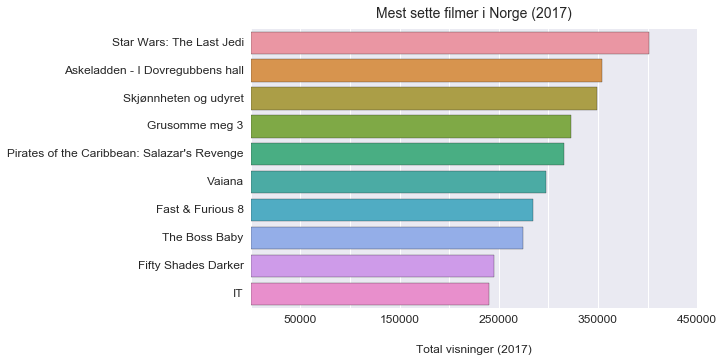

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
%matplotlib inline
sns.set_color_codes("pastel")
sns.set()
fig,ax=plt.subplots(figsize=(8,5))
bar_positions = np.arange(10) +1
tick_positions = range(0,10)
top=top10['total_views'].values
movie_title=top10['title'].values
sns.set(font_scale=1.4) 
ax=sns.barplot(y=movie_title,x=top,ax=ax)
ax.set_yticks(tick_positions)
ax.set_yticklabels(movie_title)
ax.set_xlabel("Total visninger (2017)",fontsize=12)
ax.xaxis.labelpad = 20
ttl=ax.set_title('Mest sette filmer i Norge (2017)',fontsize=14)
ttl.set_position([.5, 1.02])
ax.set_ylabel('',fontsize=20)
ax.tick_params(labelsize=12)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
for loc, spine in ax.spines.items():
    if loc in ['left','bottom','right','top']:
        spine.set_visible(False)
plt.savefig(r'C:\Users\Tewodata\Desktop\hdlss\most_watched.png',bbox_inches = 'tight')
plt.show()
